In [2]:
import pandas as pd

df3 = pd.read_table('blast_uniprot_results.txt', header=None)
# the default outfmt 6 columns
default_outfmt6_cols = 'qseqid sseqid pident length mismatch gapopen qstart qend sstart send evalue bitscore'.strip().split(' ')
df3.columns = default_outfmt6_cols

In [3]:
len(df3)

1484868

In [60]:
# filter for evalue <= 0.001
df_filtered = df3[df3['evalue'] <= 0.00001]

# filter for evalue <= 0.001
df_filtered = df3[df3['pident'] >= 75]

# sort by bitscore
df_filtered.sort_values(by='bitscore', ascending=False, inplace=True)

/Users/stronglab2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [61]:
len(df_filtered)
#df_filtered.to_csv("Filtered_Uniprot_BLAST_Table.txt", sep='\t')

5022

In [62]:
df_filtered.head()

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
710,YP_008318505.1,VFDB|VFG000671,99.177,486,4,0,1,486,1,486,0.0,961.0
636630,YP_004286239.1,VFDB|VFG000109,100.000,399,0,0,1,399,1,399,0.0,831.0
1011892,YP_001449320.1,VFDB|VFG002121,85.033,461,47,3,1,459,1,441,0.0,758.0
1028668,NP_795593.1,VFDB|VFG000965,99.703,337,1,0,1,337,1,337,0.0,683.0
420709,NP_438157.1,VFDB|VFG000965,99.703,337,1,0,1,337,1,337,0.0,683.0


In [63]:
hits = df_filtered['qseqid']
uniq_hits = list(set(hits))
len(uniq_hits)

3993

In [89]:
query = df_filtered['sseqid']
uniq_queries = list(set(query))
len(uniq_queries)

1785

### Load in Uniprot Protein Sequence IDs

In [64]:
from Bio import SeqIO
ids = []
names = []
for seq_record in SeqIO.parse("viral.1.protein.faa", "fasta"):
    ids.append(seq_record.id)
    names.append(seq_record.description)
    
viral_names = [x.split('[', 1)[1].split(']')[0] for x in names]

In [65]:
df = pd.DataFrame({'IDs': ids, 
                   'Viral Names': viral_names, 
                   'CompleteRecord': names}, columns=['IDs','Viral Names', 'Complete Record'])

In [66]:
y = df['Viral Names'].str.contains('phage')
df2=df[y]
len(df2)

155606

In [67]:
df2['Virulence'] = [1 if x in uniq_hits else 0 for x in df2['IDs']]

/Users/stronglab2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
## Group by
test = df2.groupby('Viral Names').sum()
test3 = df2.groupby('Viral Names').count()
Gene_Count = list(test3['Virulence'])

In [69]:
## Group by Bacterial Genus
genus_name = test.index
demo2 = [x.split(' ',1)[0] for x in genus_name]

In [70]:
test['Genus'] = demo2
test['Gene_Count'] = Gene_Count

test.head()

,Virulence,Genus,Gene_Count
Viral Names,,,
Acholeplasma phage MV-L1,0,Acholeplasma,4
Achromobacter phage 83-24,0,Achromobacter,61
Achromobacter phage JWAlpha,1,Achromobacter,91
Achromobacter phage JWF,1,Achromobacter,118
Achromobacter phage JWX,0,Achromobacter,67


In [71]:
test['VF_By_Count'] = list(map(lambda x,y: (x/float(y))*(100), test['Virulence'],test['Gene_Count']))
test.head()

,Virulence,Genus,Gene_Count,VF_By_Count
Viral Names,,,,
Acholeplasma phage MV-L1,0,Acholeplasma,4,0.000000
Achromobacter phage 83-24,0,Achromobacter,61,0.000000
Achromobacter phage JWAlpha,1,Achromobacter,91,1.098901
Achromobacter phage JWF,1,Achromobacter,118,0.847458
Achromobacter phage JWX,0,Achromobacter,67,0.000000


#### Average Prevelance amongst all phages

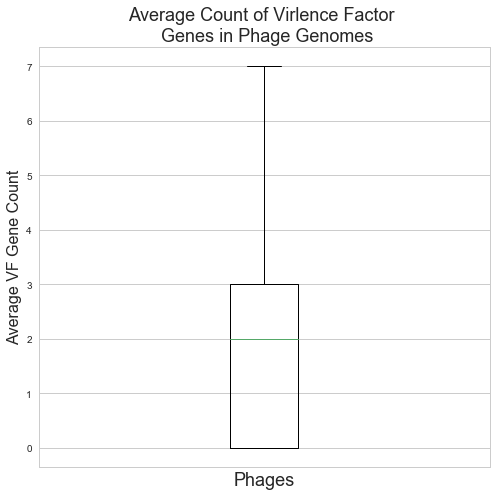

In [80]:
#### Count
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
items = test.Virulence
plt.figure(figsize=(7, 7))
plt.boxplot(items, sym='')
plt.xticks([])
plt.rc('ytick', labelsize=10)
plt.title('Average Count of Virlence Factor \n Genes in Phage Genomes', fontsize=18)
plt.xlabel('Phages', fontsize=18)
plt.ylabel('Average VF Gene Count', fontsize=16)
plt.tight_layout()
plt.savefig('All_Phages_BLAST_Count.jpg', transparent=True)

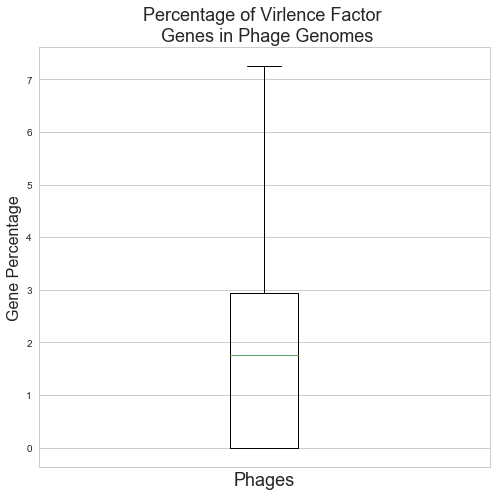

In [81]:
#### Percentage
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
items = test.VF_By_Count
plt.figure(figsize=(7, 7))
plt.boxplot(items, sym='')
plt.xticks([])
plt.rc('ytick', labelsize=10)
plt.title('Percentage of Virlence Factor \n Genes in Phage Genomes', fontsize=18)
plt.xlabel('Phages', fontsize=18)
plt.ylabel('Gene Percentage', fontsize=16)
plt.tight_layout()
plt.savefig('All_Phages_BLAST_Percentage.jpg', transparent=True)

#### Data Wrangling

In [83]:
### Count
test_Count = test.drop(['VF_By_Count', 'Gene_Count'], axis=1)

### Percentage
test2 = test.drop(['Virulence', 'Gene_Count'], axis=1)
Virulence_Avg = test2.groupby('Genus').mean()
Virulence_Avg = Virulence_Avg.sort_values(by=['VF_By_Count'], ascending=False)
Virulence_Avg.columns = ['Avg Number of Virulent Matches']
Virulence_Avg.head()

,Avg Number of Virulent Matches
Genus,
Sputnik,9.523810
Lactoccocus,8.333333
Halorubrum,7.017544
Temperate,5.357143
Celeribacter,5.357143


In [74]:
Number_of_phages = test2.groupby('Genus').count()
Number_of_phages = Number_of_phages.sort_values(by=['VF_By_Count'], ascending=False)
Number_of_phages.columns = ['Number of Phages in Genus']
Number_of_phages.head()

,Number of Phages in Genus
Genus,
Mycobacterium,249
Pseudomonas,112
Escherichia,92
Bacillus,82
Salmonella,67


In [75]:
### Number of Viruses over 30 in Genus
x = Number_of_phages[Number_of_phages['Number of Phages in Genus']>=30]
abundant_phages = x.index

In [84]:
test3 = test2[test2['Genus'].isin(abundant_phages)]

### Count
test4 = test_Count[test_Count['Genus'].isin(abundant_phages)]


In [85]:
genera = test3.groupby('Genus').median()
genera = genera.sort_values(by=['VF_By_Count'], ascending=False)
order_med = list(genera.index)


generac = test4.groupby('Genus').median()
generac = generac.sort_values(by=['Virulence'], ascending=False)
order_medc = list(generac.index)

#### Genus Box Plots Virulence Factors

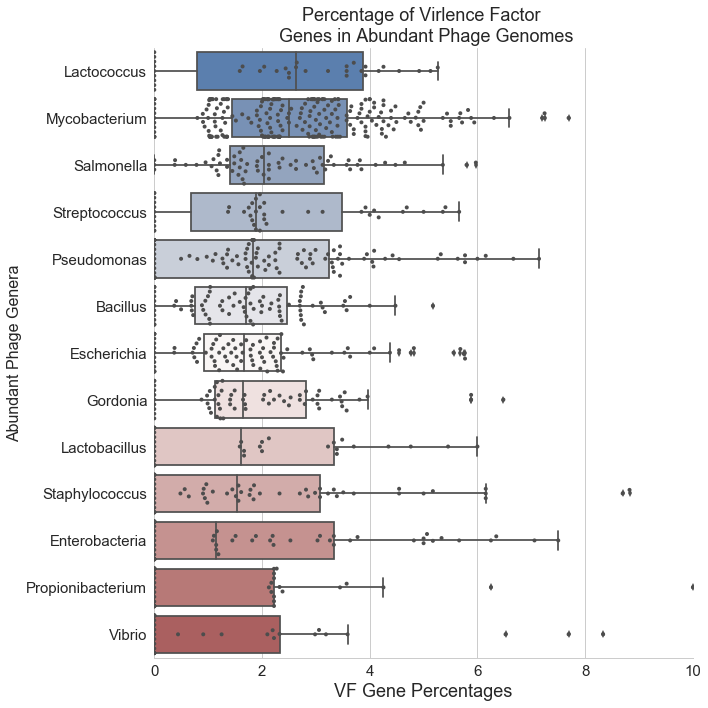

In [86]:
### Percentage
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



sns.set(style="whitegrid")
f = plt.subplots(figsize=(10, 10))


sns.boxplot(x="VF_By_Count", y="Genus", data=test3,
                whis=1.5, palette="vlag", order=order_med)


# Add in points to show each observation
sns.swarmplot(x="VF_By_Count", y="Genus", data=test3,size=4, color=".3", linewidth=0, order=order_med)


axes = plt.gca()
axes.set_xlim([0,10])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Percentage of Virlence Factor \n Genes in Abundant Phage Genomes', fontsize=18)
plt.xlabel('VF Gene Percentages', fontsize=18)
plt.ylabel('Abundant Phage Genera', fontsize=16)
plt.tight_layout()

sns.despine(trim=True, left=True)
plt.savefig('Top_Phages_Percentage_BLAST.jpg', transparent=True)

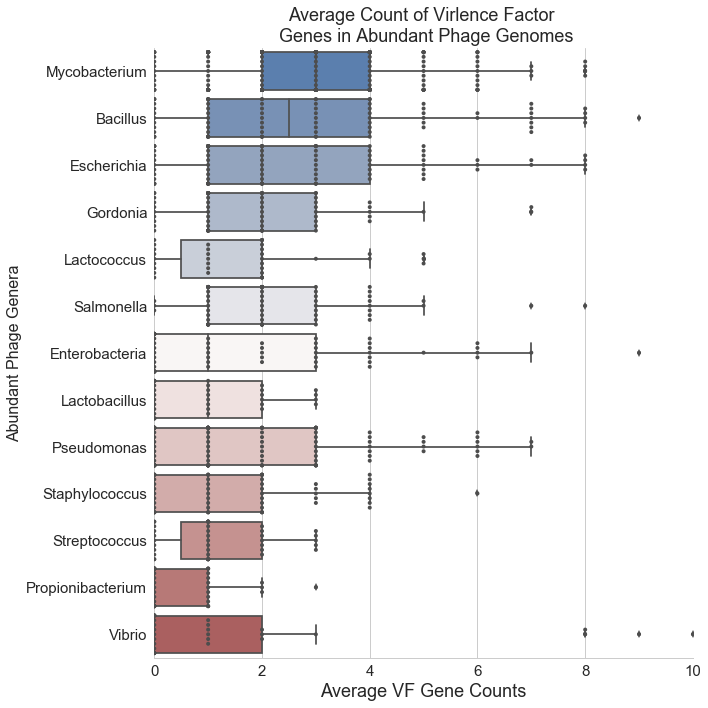

In [88]:
### Count
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



sns.set(style="whitegrid")
f = plt.subplots(figsize=(10, 10))


sns.boxplot(x="Virulence", y="Genus", data=test4,
                whis=1.5, palette="vlag", order=order_medc)


# Add in points to show each observation
sns.swarmplot(x="Virulence", y="Genus", data=test4,size=4, color=".3", linewidth=0, order=order_medc)


axes = plt.gca()
axes.set_xlim([0,10])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Average Count of Virlence Factor \n Genes in Abundant Phage Genomes', fontsize=18)
plt.xlabel('Average VF Gene Counts', fontsize=18)
plt.ylabel('Abundant Phage Genera', fontsize=16)
plt.tight_layout()

sns.despine(trim=True, left=True)
plt.savefig('Top_Phages_Percentage_Count.jpg', transparent=True)